<a href="https://colab.research.google.com/github/SakanaTakina/CSC3160/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (CSC3160/MDS6002)

This is an instruction and template for the first assignment. In this assignment, you will utilize various tools to extract spectrogram features, perform speech recognition, generate speech, and align speech. Additionally, you will summarize the provided research paper. 

Should you have any inquiries, please feel free to ask in the GitHub discussion forum found at: https://github.com/orgs/SLPcourse/discussions/categories/assignments.

Please follow the template to finish your assignment and submit in GitHub.

## Example: Extracting spectrogram

In [ ]:
!pip install torch>=1.2.0     #install torch
!pip install torchaudio       #install torchaudio
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

!pip install librosa          #install librosa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Shape of waveform: torch.Size([1, 139421])
Sample rate of waveform: 22050
Shape of resampled_waveform: torch.Size([1, 101168])


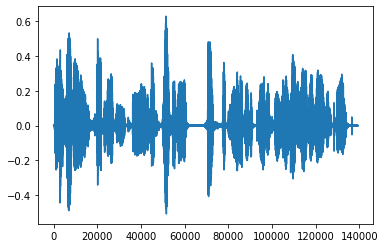

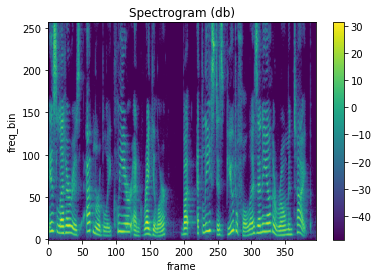

In [ ]:
import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 512

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform) 

# create an object that extract spectrogram
spec_trans = T.Spectrogram(n_fft=n_fft, power=2)

# extract spectrogram
spec = spec_trans(resampled_waveform)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

print("Shape of resampled_waveform: {}".format(resampled_waveform.size()))

plt.figure()
plt.plot(waveform.t().numpy())

plot_spectrogram(spec[0])


## (1) [10 marks] Extract mel-spectrogram

In this part, you need to extract power spectorgram (FFT 1024) and 80-dimensional mel-spectrogram (80 Mel Filter Banks) with 5ms, 10ms, 15ms frameshift, with the same window size 30ms. The speech signal is at 16 kHz sampling rate.
* Visualize each of the power spectorgram (FFT 1024) and 80-dimensional mel-spectrogram
* Plot the spectrum of the 150th frame of the 512-dimensional spectrogram with 10 ms frameshift



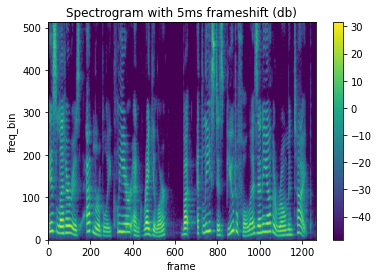

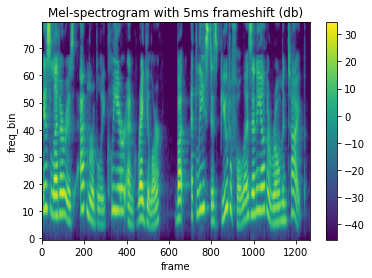

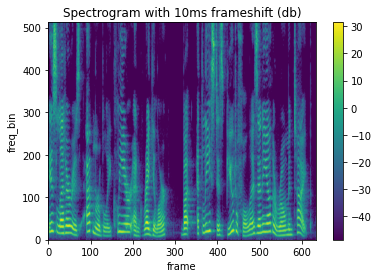

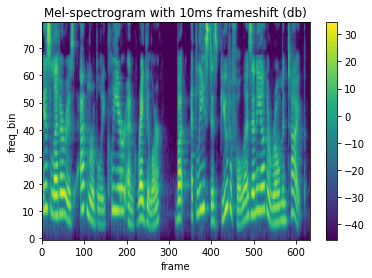

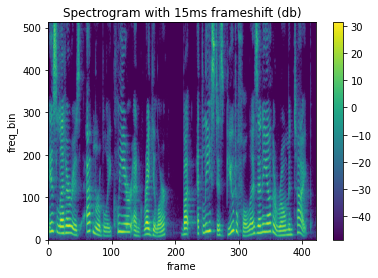

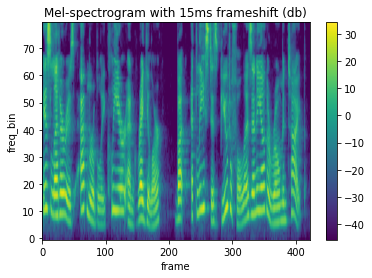

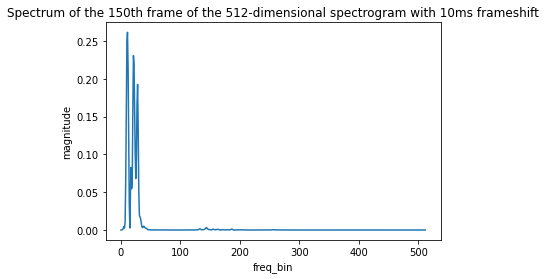

In [22]:
import requests
import numpy as np
import torch
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 1024
n_mels = 80

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform)

# set window size 30ms
win_length = (int(target_sample_rate * 0.03))

# extract spectrogram and mel-spectrogram with 5ms frameshift
hop_length = int(target_sample_rate * 0.005)
spectrogram_5ms = T.Spectrogram(n_fft=n_fft, hop_length=hop_length, win_length=win_length, power=2)(resampled_waveform)
mel_spectrogram_5ms = T.MelSpectrogram(n_fft=n_fft, sample_rate=target_sample_rate, n_mels=n_mels, hop_length=hop_length, win_length=win_length)(resampled_waveform)

# extract spectrogram and mel-spectrogram with 10ms frameshift
hop_length = int(target_sample_rate * 0.01)
spectrogram_10ms = T.Spectrogram(n_fft=n_fft, hop_length=hop_length, win_length=win_length, power=2)(resampled_waveform)
mel_spectrogram_10ms = T.MelSpectrogram(n_fft=n_fft, sample_rate=target_sample_rate, n_mels=n_mels, hop_length=hop_length, win_length=win_length)(resampled_waveform)

# extract spectrogram and mel-spectrogram with 15ms frameshift
hop_length = int(target_sample_rate * 0.015)
spectrogram_15ms = T.Spectrogram(n_fft=n_fft, hop_length=hop_length, win_length=win_length, power=2)(resampled_waveform)
mel_spectrogram_15ms = T.MelSpectrogram(n_fft=n_fft, sample_rate=target_sample_rate, n_mels=n_mels, hop_length=hop_length, win_length=win_length)(resampled_waveform)

# visualize each of the power spectorgram and 80-dimensional mel-spectrogram
plot_spectrogram(spectrogram_5ms[0], title="Spectrogram with 5ms frameshift (db)")
plot_spectrogram(mel_spectrogram_5ms[0], title="Mel-spectrogram with 5ms frameshift (db)")
plot_spectrogram(spectrogram_10ms[0], title="Spectrogram with 10ms frameshift (db)")
plot_spectrogram(mel_spectrogram_10ms[0], title="Mel-spectrogram with 10ms frameshift (db)")
plot_spectrogram(spectrogram_15ms[0], title="Spectrogram with 15ms frameshift (db)")
plot_spectrogram(mel_spectrogram_15ms[0], title="Mel-spectrogram with 15ms frameshift (db)")

# plot the spectrum of the 150th frame of the 512-dimensional spectrogram with 10 ms frameshift
frame = spectrogram_10ms[0,:,149].t().numpy()
plt.figure()
plt.plot(frame)
plt.xlabel('freq_bin')
plt.ylabel('magnitude')
plt.title('Spectrum of the 150th frame of the 512-dimensional spectrogram with 10ms frameshift')
plt.show()


## (2) [10 marks] Record yourself

Record yourself to read the following script, which is the same as LJ001-0048.wav. Then, resample your recording to 16 kHz and 16-bit depth.

`his letter is admirably clear and regular, but at least as beautiful as any other Roman type.`

You can use your phone to record and upload to GitHub.

## (3) [10 marks] Speech recognition with Whisper model

[Whisper](https://github.com/openai/whisper) is a general-purpose speech recognition model released by OpenAI. Your task is to use the whisper model to perform speech recognition on the provided audio sample and your own recording. 

In [ ]:
# Write your implementation here



## (4) [10 marks] Text-to-speech synthesis

Text-to-speech synthesis is to generate speech for a given text. Torchaudio has provided pretrained [Tacotron2-based model](https://pytorch.org/audio/stable/generated/torchaudio.pipelines.Tacotron2TTSBundle.html#torchaudio.pipelines.Tacotron2TTSBundle). Your task is to 
* Use the pretrained bundle to generate speech using the Character-based TTS pipeline with Tacotron2 and WaveRNN.
* Use the pretrained bundle to generate speech using the Phoneme-based TTS pipeline with Tacotron2 and WaveRNN.
* Discuss the difference between two audio samples from the above two pipelines.

The script you need to use for the text-to-speech synthesis task:

`I am <YOUR_NAME>, my student ID is <YOUR_STUDENT_ID>. I am taking the [CSC3160/MDS6002] course this semester.`


***Note: Replace `<YOUR_NAME>` and `<YOUR_STUDENT_ID>` with your real name and your student ID, respectively.***

In [ ]:
# Write your implementation here



## (5) [10 marks] Fundamental frequency

Extract the fundamental frequency (F0) trajectory of the provided speech sample and your own recording, and calculate the mean of your fundamental frequency trajectory. Both audio samples need to at 16 kHz, and the hop length should 160.

In this task, you need to:
* Plot the fundamental frequency trajectory and the F0 mean of the provided speech sample
* Plot the fundamental frequency trajectory and the F0 mean of your own recording

You can use the [API from librosa](https://librosa.org/doc/main/generated/librosa.pyin.html). 

In [ ]:
# Write your implementation here



## (6) [20 marks] Dynamic time warping

Now you have the reference speech (https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav) and your own recording. Their lengths are different. In some tasks, we need to align the speech to have same length. Please use Dynamic Time Warping to align your recording and reference speech sample. You need to align them by using 80-dimensional mel-spectrogram.

Here are your tasks:
* Visualize the alignment 80-dimensional mel-spectrogram of the reference speech and your own recording
* Visualize the wraped path/map from the DTW algorithm. [Here](https://raw.githubusercontent.com/cbellei/DTW/master/DTW.png) is how the wraped path may look like.

You can use [FastDTW](https://github.com/slaypni/fastdtw) tool to align them.




In [ ]:
# Write your implementation here


## (7) [30 marks] Paper reading

Please read the paper provided below and summarize its key points in 200-300 words. Your summary should include
* a description of the problem being addressed
* the paper's main contributions
* the metrics used for evaluation, and the experimental results
* the findings from the paper

[*PitchNet: Unsupervised Singing Voice Conversion with Pitch Adversarial Network*](https://arxiv.org/abs/1912.01852)

**Note: longer than 300 words may have negative impact.**

```
# Write your summary here (200-300 words)
```

